In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/model training/Final_ln_ren_updated1.xlsx')

In [ ]:
#data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_after_eda_test_bankst.6.xlsx')

In [ ]:
data.columns

Index(['OpportunityID', 'assetpropcountever_value', 'assetpropcountever_flag',
       'assetpropcountcurrent_value', 'assetpropcountcurrent_flag',
       'assetpropstatecountcurrent_value', 'assetpropstatecountcurrent_flag',
       'assetproplotsizetotalever_value', 'assetproplotsizetotalever_flag',
       'assetproplotsizetotalcurrent_value',
       ...
       'Industry_Mining', 'Industry_Retail', 'Industry_Services',
       'Industry_Transportation & Public Utilities', 'Industry_Wholesale',
       'Industry_Wholesale Trade', 'Drop_category_Neutral/Null',
       'Drop_category_Positive', 'LatestMonth_ReturnItemDays_value',
       'LatestMonth_ReturnItemDays_flag'],
      dtype='object', length=667)

In [ ]:
# data_test.columns

In [ ]:
# data_test[['Industry_E-Commerce', 'Industry_Wholesale Trade', 'Drop_category_Neutral/Null']] = 0

In [ ]:
# data_test = data_test[['OpportunityID', 'Renewal_PreviousPace',
#        'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
#        'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
#        'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
#        'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
#        'NumberOfBankStatements', 'Credit_Score__c', 'Time_in_Business__c',
#        'BBC_Position__c', 'HB_with_LCF_Payment__c',
#        'Last3Statments_MA_AdjustedMonthlyDeposits',
#        'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
#        'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
#        'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
#        'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
#        'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
#        'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
#        'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
#        'drop_percent', 'Is_this_Business_home_based__c_Yes',
#        'Industry_Construction', 'Industry_E-Commerce',
#        'Industry_Finance, Insurance, Real Estate', 'Industry_Manufacturing',
#        'Industry_Mining', 'Industry_Retail', 'Industry_Services',
#        'Industry_Transportation & Public Utilities', 'Industry_Wholesale',
#        'Industry_Wholesale Trade', 'Drop_category_Neutral/Null',
#        'Drop_category_Positive']]

In [ ]:
data.head(3)

,OpportunityID,assetpropcountever_value,assetpropcountever_flag,assetpropcountcurrent_value,assetpropcountcurrent_flag,assetpropstatecountcurrent_value,assetpropstatecountcurrent_flag,assetproplotsizetotalever_value,assetproplotsizetotalever_flag,assetproplotsizetotalcurrent_value,...,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive,LatestMonth_ReturnItemDays_value,LatestMonth_ReturnItemDays_flag
0,0062M00000gYqZQQA0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0062M00000gYSpGQAW,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0062M00000gYsQcQAK,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
# data_test.head()

In [ ]:
data.shape

(3347, 667)

In [ ]:
# data_test.shape

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Columns: 667 entries, OpportunityID to LatestMonth_ReturnItemDays_flag
dtypes: float64(62), int64(604), object(1)
memory usage: 17.0+ MB


In [ ]:
data.corr()['WriteOff_YN'].sort_values().head(30)

NumberOfBankStatements                -0.345845
sosincorporationtimeoldest_value      -0.111388
Time_in_Business__c                   -0.106365
ucctimeoldest_value                   -0.102060
firmageobserved_value                 -0.100275
inquiryconsumerphone_f2               -0.097845
businessrecordtimeoldest_value        -0.096566
inputaddrtimeoldest_value             -0.094101
Renewal_PreviousPaidPercentageOfRTR   -0.093275
lientimeoldest_value                  -0.088352
Renewal_CountPreviousDeals            -0.085352
Industry_Services                     -0.078270
orglocationcount_value                -0.071592
inputaddrsourcecount_value            -0.070962
lientimenewest_value                  -0.070431
orgsinglelocation_0.0                 -0.069673
inputphonetype_0.0                    -0.069533
associatecurrcountwithprop_value      -0.068366
ucccount_value                        -0.066587
b2bactvfltbalpct_flag                 -0.065819
Credit_Score__c                       -0

In [ ]:
data.corr()['WriteOff_YN'].sort_values().tail(30)

b2bactvfltbalpct_value                        0.057866
Renewal_TwoWeekBounces                        0.058134
b2bactvfltworstperfindx_value                 0.059733
inquiryconsumerphone_f3                       0.060492
b2bactvfltbaltotrnge_value                    0.066515
Industry_Transportation & Public Utilities    0.079499
firmreportedsalesrange_-1.0                   0.080503
lienjudgmentdollartotal_flag                  0.084764
outbestnaics_flag                             0.084957
Drop_category_Positive                        0.088072
firmemployeerangecount_-1.0                   0.095467
drop_percent                                  0.100379
FundedWriteOffAmount_Gross                    0.318592
WOGross_AdvanceBalance                        0.362216
WriteOff_YN                                   1.000000
assetaircraftcount_value                           NaN
associatewatchlistcount_value                      NaN
firmownershiptype_f3                               NaN
firmparent

In [ ]:
data.drop(labels = ["assetaircraftcount_value",
                     "associatewatchlistcount_value",
                     'firmownershiptype_f3',
                     "firmparentcompanyind_f2",
                     "inquiryconsumeraddress_f1",
                     "lienforeclosurecount_value",
                     "lienforeclosuretotalamount_value",
                     "lientenantcount_value",
                     "lientenanttotalamount_value",
                     "lienothertotalamount_value",
                     "judgmentsothercount_value",
                     "judgmentothertotalamount_value",
                     "orgaddrlegalentitycount_flag",
                     "lienmechanicscount_value",
                     "lienmechanicstotalamount_value"],axis =1, inplace= True)

In [ ]:
data.corr()["WriteOff_YN"].sort_values().tail(30)

b2bactvfltcnt_value                           0.047903
b2bactvbaltotrnge_value                       0.048312
b2bactv61pdpdcnt_value                        0.048344
b2bfltpct2y_value                             0.048429
inquiryconsumeraddress_f3                     0.048532
busexeclinkrepaddronfile_0.0                  0.048854
inputphoneproblems_-1.0                       0.049153
inputphonetype_-1.0                           0.049153
inputphoneresidential_-1.0                    0.049153
busexeclinkrepssnonfile_0.0                   0.049901
inputphoneentitycount_flag                    0.050629
inquiryconsumerphone_f1                       0.050629
outbestbusTIN_flag                            0.055602
orgsinglelocation_1.0                         0.055977
b2bactvfltpct_value                           0.056787
b2bactvfltbalpct_value                        0.057866
Renewal_TwoWeekBounces                        0.058134
b2bactvfltworstperfindx_value                 0.059733
inquirycon

In [ ]:
#data.drop(['FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

In [ ]:
data.shape

(3347, 652)

In [ ]:
#  Information value and weight of evidence
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


In [ ]:
iv, woe = iv_woe(data = data, target = 'WriteOff_YN', bins=20, show_woe = False)

Information value of OpportunityID is 1.599503
Information value of Renewal_PreviousPace is 0.003135
Information value of Renewal_PreviousPaidPercentageOfRTR is 0.089509
Information value of Renewal_CountPreviousDeals is 0.062194
Information value of Renewal_PreviousCountBounces is 0.026787
Information value of Renewal_PreviousPosition is 0.002303
Information value of Renewal_PreviousHBwLCF is 0.02062
Information value of Renewal_PreviousAvgMonthRevenue is 0.057557
Information value of Renewal_PreviousAvgDailyBalance is 0.044939
Information value of Renewal_TwoWeekBounces is 0.011913
Information value of NumberOfBankStatements is 0.943863
Information value of Credit_Score__c is 0.066556
Information value of Time_in_Business__c is 0.191343
Information value of BBC_Position__c is 0.001993
Information value of HB_with_LCF_Payment__c is 0.024835
Information value of Last3Statments_MA_AdjustedMonthlyDeposits is 0.049792
Information value of Last3Statments_MA_AvgDailyBalance is 0.023364
Info

In [ ]:
data_corr = data.corr()['WriteOff_YN']
(data_corr**2)**0.5

Renewal_PreviousPace                          0.003269
Renewal_PreviousPaidPercentageOfRTR           0.094702
Renewal_CountPreviousDeals                    0.082606
Renewal_PreviousCountBounces                  0.020369
Renewal_PreviousPosition                      0.001372
Renewal_PreviousHBwLCF                        0.014973
Renewal_PreviousAvgMonthRevenue               0.031837
Renewal_PreviousAvgDailyBalance               0.025516
Renewal_TwoWeekBounces                        0.052650
NumberOfBankStatements                        0.308852
Credit_Score__c                               0.059382
Time_in_Business__c                           0.108244
BBC_Position__c                               0.012783
HB_with_LCF_Payment__c                        0.020881
Last3Statments_MA_AdjustedMonthlyDeposits     0.000823
Last3Statments_MA_AvgDailyBalance             0.003192
Last3Statments_MA_ReturnItemDays              0.029656
Last3Statments_MA_OverdraftDays               0.037383
Last3Statm

In [ ]:
corr_df = pd.DataFrame((data_corr**2)**0.5)
corr_df.sort_values(by = 'WriteOff_YN',ascending = False)[3:]

,WriteOff_YN
NumberOfBankStatements,0.308852
Time_in_Business__c,0.108244
Renewal_PreviousPaidPercentageOfRTR,0.094702
drop_percent,0.093628
Drop_category_Positive,0.091829
Renewal_CountPreviousDeals,0.082606
Industry_Services,0.073244
Industry_Transportation & Public Utilities,0.063958
Credit_Score__c,0.059382
Industry_Construction,0.052951


In [ ]:
iv.sort_values(by='IV',ascending = False)[3:]

,Variable,IV
0,NumberOfBankStatements,0.943863
0,Time_in_Business__c,0.191343
0,drop_percent,0.104054
0,Renewal_PreviousPaidPercentageOfRTR,0.089509
0,AdjustedMonthlyDeposits,0.070209
0,Credit_Score__c,0.066556
0,Renewal_CountPreviousDeals,0.062194
0,Renewal_PreviousAvgMonthRevenue,0.057557
0,PctChangeInReveune,0.055972
0,Avg_ReturnItemdays,0.054836


### Model Training

In [ ]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [ ]:
X = data[['b2bopsbalmaxmsnc2y_value', 'inputaddrtimeoldest_value', 'firmreportedsalesrange_10.0',
              'businessrecordtimeoldest_value', 'Last3Statments_MA_NumReturnItems',
              'lientimeoldest_value', 'lienfedtaxcount_value', 'lientimenewest_value',
              'associateliencount_value', 'b2bactv61pdpdbaltotpct_value', 'associatecount_value',
              'Avg_ReturnItemdays', 'inquirycreditcount03m_value', 'uccrolesactive_2.0',
              'businessactivity03m_2.0', 'inputaddrtype_0.0', 'b2boldmsnc2y_value',
              'b2bworstperfmsnc2y_value', 'associatecountycount_value', 'b2bactvbalavg_value',
              'inputphoneproblems_0.0', 'ucctimenewest_value', 'Last3Statments_MA_AdjustedMonthlyDeposits',
              'Industry_Construction', 'Industry_Services', 'Renewal_PreviousAvgMonthRevenue',
              'firmreportedsalesrange_-1.0', 'drop_percent', 'uccroles_2.0', 'busexeclinkrepaddronfile_0.0',
              'associatecountwithjudgment_value', 'inputphonetype_0.0',
              'Renewal_PreviousPaidPercentageOfRTR', 'ucccount_value', 'Industry_Retail',
              'busexeclinkrepaddronfile_2.0', 'PctAvgDailybalance2AvgMonthlyDeposits',
              'b2bothbalmax2y_value', 'Renewal_PreviousCountBounces', 'Renewal_PreviousHBwLCF',
              'TwoMonthAvg_AdjustedMonthlyDeposits', 'b2bactvcntgrow1y_value',
              'inputphoneentitycount_value', 'sostimeagentchange_value', 'inputbusnameotherbusnamematch_0.0',
              'b2bactvbaltotgrow1y_value', 'PctChangeInReveune', 'associatejudgmentcount_value',
              'Time_in_Business__c', 'Credit_Score__c']]
y = data['WriteOff_YN']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   b2bopsbalmaxmsnc2y_value                   3347 non-null   int64  
 1   inputaddrtimeoldest_value                  3347 non-null   int64  
 2   firmreportedsalesrange_10.0                3347 non-null   int64  
 3   businessrecordtimeoldest_value             3347 non-null   int64  
 4   Last3Statments_MA_NumReturnItems           3347 non-null   float64
 5   lientimeoldest_value                       3347 non-null   int64  
 6   lienfedtaxcount_value                      3347 non-null   int64  
 7   lientimenewest_value                       3347 non-null   int64  
 8   associateliencount_value                   3347 non-null   int64  
 9   b2bactv61pdpdbaltotpct_value               3347 non-null   float64
 10  associatecount_value    

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=102,stratify = y)

In [ ]:
# X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross','LatestMonth_ReturnItemDays',
#               'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance','Last3Statments_Sum_NumReturnItems'],axis = 1)
# y_test = data_test['WriteOff_YN']

In [ ]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
#print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
#print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2677, 50)
Shape of x_val is: (670, 50)
----------------------------------------------
Shape of y_train is: (2677,)
Shape of y_val is: (670,)


In [ ]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [ ]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [ ]:
#checking the skewness of validation set
# print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
# print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [ ]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

1158.26

In [ ]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3702.01

In [ ]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8590.130000000001

In [ ]:
# weight = []
# for i in data.index:
#     if data['WriteOff_YN'][i] == 0:
#         weight.append(1.0)
#     else:
#         if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#             weight.append(1.25)
#         elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#             weight.append(1.5)
#         elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#             weight.append(2.0)
#         else:
#             weight.append(2.25)

# weight = np.array(weight)
# len(weight)

In [ ]:
y_train

3089    0
2125    0
780     0
3312    1
3213    1
       ..
431     0
3018    0
1395    0
1386    0
3236    1
Name: WriteOff_YN, Length: 2677, dtype: int64

In [ ]:
weight = []
for i in y_train.index:
  if y_train[i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

2677

In [ ]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [ ]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [ ]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [ ]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0.1],
    'reg_lambda':[1], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1],
    'min_child_weight':[6]
}

In [ ]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic',scale_pos_weight = {1:0.76,0:0.24}) #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl,
                   param_grid=parameters,
                   scoring='roc_auc',
                   n_jobs=-1,
                   cv=5,
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

54

In [ ]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              min_child_weight=6, n_estimators=20, reg_alpha=0.1,
              scale_pos_weight=3, subsample=0.75, use_label_encoder=False)

In [ ]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'min_child_weight': 6,
 'n_estimators': 20,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.75,
 'use_label_encoder': False}

In [ ]:
#predict_y_test = clf.predict(X_test)
#predict_y_proba_test = clf.predict_proba(X_test)

predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

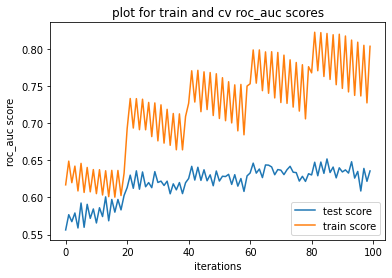

In [ ]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score

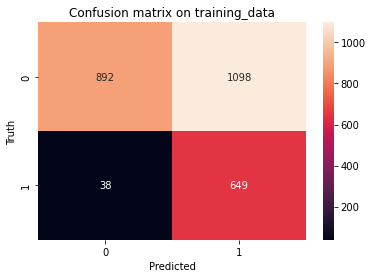

----------------------------
TP: 649
TN: 892
FP: 1098
FN: 38
F1-score: 0.5332785538208711
accuracy: 0.5756443780351139
Precision: 0.3714939896966228
Recall: 0.9446870451237264


In [ ]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

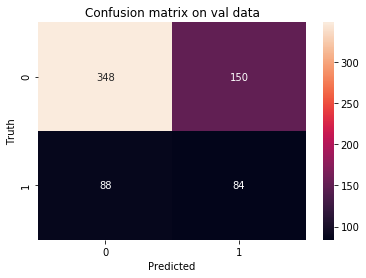

----------------------------
----------------------------
TP: 84
TN: 348
FP: 150
FN: 88
----------------------------
F1-score: 0.4137931034482758
accuracy: 0.6447761194029851
Precision: 0.358974358974359
Recall: 0.4883720930232558


In [ ]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on val data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

In [ ]:
# # on test set
# sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
# plt.title('Confusion matrix on test data')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()
# print("----------------------------")

# tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
# print("----------------------------")

# print('TP: {}'.format(tp))
# print('TN: {}'.format(tn))
# print('FP: {}'.format(fp))
# print('FN: {}'.format(fn))
# print("----------------------------")

# print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
# print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
# print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
# print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

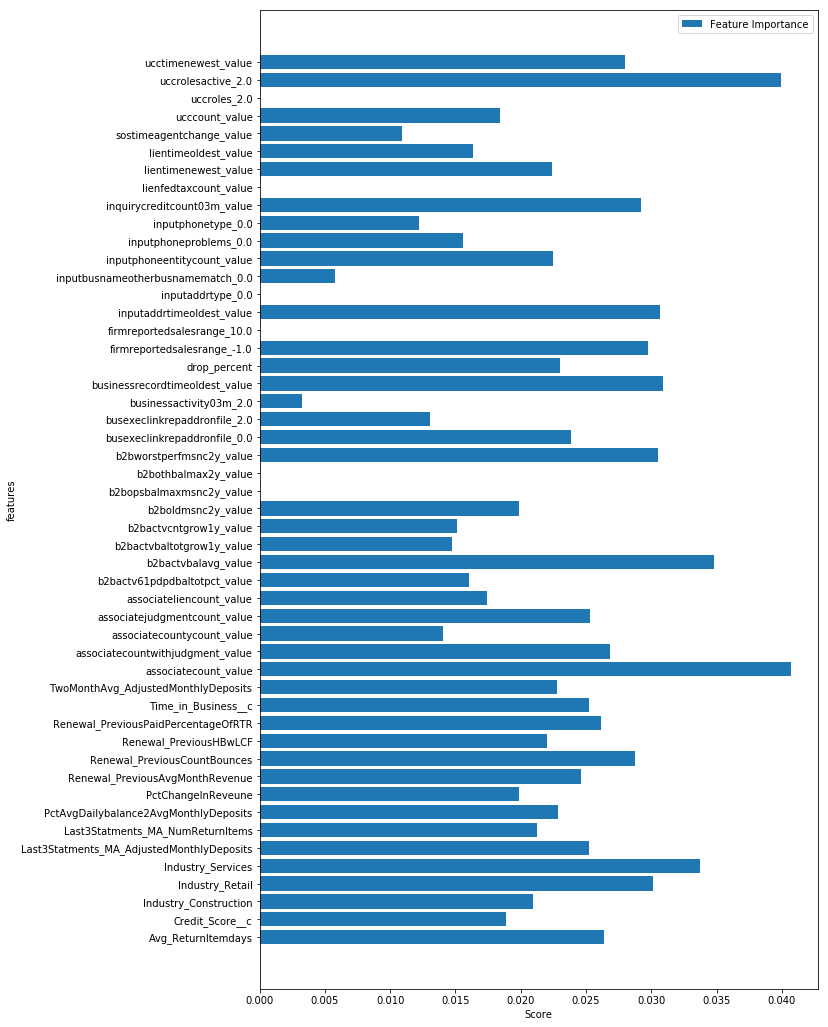

In [ ]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

In [ ]:
feature_importance = pd.DataFrame({'Features':features,'Coefficients':gain})
feature_importance.sort_values(by = 'Coefficients',ascending = False)[:50]

,Coefficients,Features
10,0.040706,associatecount_value
13,0.039904,uccrolesactive_2.0
19,0.034834,b2bactvbalavg_value
24,0.033715,Industry_Services
3,0.030864,businessrecordtimeoldest_value
1,0.030657,inputaddrtimeoldest_value
17,0.030503,b2bworstperfmsnc2y_value
34,0.030126,Industry_Retail
26,0.029726,firmreportedsalesrange_-1.0
12,0.029211,inquirycreditcount03m_value


In [ ]:
feature_importance = feature_importance.sort_values(by = 'Coefficients',ascending = False)
c=0
st = []
for i in feature_importance.index:
    st.append(feature_importance['Features'][i])
    c += 1
    if c==50:
        break
print(st)

['b2bopsbalmaxmsnc2y_value', 'inputaddrtimeoldest_value', 'firmreportedsalesrange_10.0', 'businessrecordtimeoldest_value', 'Last3Statments_MA_NumReturnItems', 'lientimeoldest_value', 'lienfedtaxcount_value', 'lientimenewest_value', 'associateliencount_value', 'b2bactv61pdpdbaltotpct_value', 'associatecount_value', 'Avg_ReturnItemdays', 'inquirycreditcount03m_value', 'uccrolesactive_2.0', 'businessactivity03m_2.0', 'inputaddrtype_0.0', 'b2boldmsnc2y_value', 'b2bworstperfmsnc2y_value', 'associatecountycount_value', 'b2bactvbalavg_value', 'inputphoneproblems_0.0', 'ucctimenewest_value', 'Last3Statments_MA_AdjustedMonthlyDeposits', 'Industry_Construction', 'Industry_Services', 'Renewal_PreviousAvgMonthRevenue', 'firmreportedsalesrange_-1.0', 'drop_percent', 'uccroles_2.0', 'busexeclinkrepaddronfile_0.0', 'associatecountwithjudgment_value', 'inputphonetype_0.0', 'Renewal_PreviousPaidPercentageOfRTR', 'ucccount_value', 'Industry_Retail', 'busexeclinkrepaddronfile_2.0', 'PctAvgDailybalance2Av

# Experiment with the 50 most important features

# For Train data

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
3089,0
2125,0
780,0
3312,1
3213,1
3291,0
3109,0
1696,0
3179,0
1944,1


In [ ]:
check['Predicted Values'] = predict_y_train

In [ ]:
check

,WriteOff_YN,Predicted Values
3089,0,0
2125,0,0
780,0,0
3312,1,1
3213,1,1
3291,0,0
3109,0,1
1696,0,0
3179,0,0
1944,1,1


In [ ]:
predict_y_proba_train

array([[ 0.91231084,  0.08768915],
       [ 0.62259567,  0.3774043 ],
       [ 0.76569688,  0.2343031 ],
       ..., 
       [ 0.74772137,  0.25227863],
       [ 0.93641776,  0.06358225],
       [ 0.32651764,  0.67348236]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_train:
    write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
3089,0,0,0.087689
2125,0,0,0.377404
780,0,0,0.234303
3312,1,1,0.819155
3213,1,1,0.928201
3291,0,0,0.318983
3109,0,1,0.524061
1696,0,0,0.056630
3179,0,0,0.166918
1944,1,1,0.762643


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.978606402874
Min_propability_value:  0.00519271194935


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
3089,0,0,0.087689,0062M00000mTVrOQAW
2125,0,0,0.377404,0062M00000g9zHNQAY
780,0,0,0.234303,0062M00000nX1vCQAS
3312,1,1,0.819155,0062M00000l03MAQAY
3213,1,1,0.928201,0062M00000n1LlWQAU
3291,0,0,0.318983,0062M00000kzSydQAE
3109,0,1,0.524061,0062M00000nYP8nQAG
1696,0,0,0.056630,0062M00000iCo1OQAS
3179,0,0,0.166918,0062M00000kz7bhQAA
1944,1,1,0.762643,0062M00000nZkEwQAK


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.978606402874
Min_propability_value:  0.00519271194935


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
#     funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
#     gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
#     funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
#     gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
#     funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
#     gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
#     funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
#     gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
#     funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
#     gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
#     funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
#     gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
#     funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
#     gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
#     funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
#     gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
#     funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
#     gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
#     funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
#     gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
3089,0,0,0.087689,0062M00000mTVrOQAW,2
2125,0,0,0.377404,0062M00000g9zHNQAY,6
780,0,0,0.234303,0062M00000nX1vCQAS,4
3312,1,1,0.819155,0062M00000l03MAQAY,10
3213,1,1,0.928201,0062M00000n1LlWQAU,10
3291,0,0,0.318983,0062M00000kzSydQAE,5
3109,0,1,0.524061,0062M00000nYP8nQAG,7
1696,0,0,0.056630,0062M00000iCo1OQAS,1
3179,0,0,0.166918,0062M00000kz7bhQAA,3
1944,1,1,0.762643,0062M00000nZkEwQAK,9


In [ ]:
check['Predicted_Prob_WO = 1'].nunique()

2677

In [ ]:
check['Predicted_Prob_WO = 1'].max()

0.97860640287399292

In [ ]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.8091840147972108

In [ ]:
len(check[check['Decile']==10])

268

In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
918,0,0,0.005193,0062M00000o9OgKQAU,1
1281,0,0,0.005962,0062M00000oA7LpQAK,1
3265,0,0,0.007235,0062M00000mzzDGQAY,1
1584,0,0,0.009011,0062M00000mdrysQAA,1
980,0,0,0.009666,0062M00000kyaxaQAA,1
2753,0,0,0.010330,0062M00000idZJqQAM,1
701,0,0,0.010632,0062M00000kx1ciQAA,1
405,0,0,0.011955,0062M00000hm9UCQAY,1
2222,0,0,0.012294,0062M00000kyIsIQAU,1
2375,0,0,0.014676,0062M00000mfyvzQAA,1


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
918,0,0,0.005193,0062M00000o9OgKQAU,1
1281,0,0,0.005962,0062M00000oA7LpQAK,1
3265,0,0,0.007235,0062M00000mzzDGQAY,1
1584,0,0,0.009011,0062M00000mdrysQAA,1
980,0,0,0.009666,0062M00000kyaxaQAA,1
2753,0,0,0.010330,0062M00000idZJqQAM,1
701,0,0,0.010632,0062M00000kx1ciQAA,1
405,0,0,0.011955,0062M00000hm9UCQAY,1
2222,0,0,0.012294,0062M00000kyIsIQAU,1
2375,0,0,0.014676,0062M00000mfyvzQAA,1


In [ ]:
len(exp_df[exp_df['Decile']==1])

268

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

2677

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

687

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    268
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(0, 0, 0, 0, 3, 16, 45, 136, 227, 260)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(0, 0, 0, 0, 3, 19, 64, 200, 427, 687)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

0.0 0.0 0.0 0.0 1.1194029850746268 5.992509363295881 16.791044776119403 50.93632958801498 84.70149253731343 97.01492537313433


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles,
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

0.0 0.0 0.0 0.0 0.43668122270742354 2.7656477438136826 9.315866084425037 29.112081513828237 62.154294032023294 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses

- The value of lift in case of good model should be high.s

In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.0 0.0 0.0 0.0 0.008733624454148471 0.046094129063561376 0.13308380120607197 0.363901018922853 0.6906032670224811 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.081202320754528046,
 0.14172787964344025,
 0.1997704803943634,
 0.2694888710975647,
 0.34948420524597168,
 0.44911625981330872,
 0.57336229085922241,
 0.69738364219665527,
 0.80889147520065308,
 0.97860640287399292]

In [ ]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.0051927119493484497,
 0.081222705543041229,
 0.14183902740478516,
 0.19979853928089142,
 0.26949363946914673,
 0.34954285621643066,
 0.44961026310920715,
 0.57479196786880493,
 0.69768595695495605,
 0.80962282419204712]

In [ ]:
avg_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[4.97, 11.04, 17.15, 23.42, 31.16, 39.68, 51.01, 63.59, 75.52, 86.85]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[268, 268, 267, 268, 268, 267, 268, 267, 268, 268]

In [ ]:
funded_amt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
gross_amt

[6106.26,
 13131.89,
 53307.86,
 78869.71999999999,
 487366.76,
 257885.05,
 634056.11,
 1561268.2700000003,
 1187245.8100000003,
 1273338.9000000008]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.001099716475232148,
 0.0034647248083093988,
 0.01306528749338485,
 0.027269453460924135,
 0.11504253476642247,
 0.16148674745980046,
 0.2756780774045796,
 0.5568571360716186,
 0.7706760329753432,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0020273107569721118,
 0.0026160837105987937,
 0.011635206041557534,
 0.01408169643654452,
 0.08666408707542993,
 0.050072977975155836,
 0.08604915399507315,
 0.23470518367297855,
 0.26210831199222895,
 0.29116536223211026]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            #'Funded_$':funded_amt,
            #'%_Funded_$':funded_amt_pct,
            #'Funded_WO_Gross_$':gross_amt,
            #'%_Funded_WO_Gross_$':gross_amt_pct,
            #"Cum_WO_$" :cum_gross_pct,
            #'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,0.000000,4.97,0.000000,1,8.12,0.52,268,0
1,0.000000,11.04,0.000000,2,14.17,8.12,268,0
2,0.000000,17.15,0.000000,3,19.98,14.18,267,0
3,0.000000,23.42,0.000000,4,26.95,19.98,268,0
4,1.119403,31.16,0.436681,5,34.95,26.95,268,3
5,5.992509,39.68,2.765648,6,44.91,34.95,267,16
6,16.791045,51.01,9.315866,7,57.34,44.96,268,45
7,50.936330,63.59,29.112082,8,69.74,57.48,267,136
8,84.701493,75.52,62.154294,9,80.89,69.77,268,227
9,97.014925,86.85,100.000000,10,97.86,80.96,268,260


In [ ]:
#final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
#final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
#final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,0.00,4.97,0.00,1,8.12,0.52,268,0
1,0.00,11.04,0.00,2,14.17,8.12,268,0
2,0.00,17.15,0.00,3,19.98,14.18,267,0
3,0.00,23.42,0.00,4,26.95,19.98,268,0
4,1.12,31.16,0.44,5,34.95,26.95,268,3
5,5.99,39.68,2.77,6,44.91,34.95,267,16
6,16.79,51.01,9.32,7,57.34,44.96,268,45
7,50.94,63.59,29.11,8,69.74,57.48,267,136
8,84.70,75.52,62.15,9,80.89,69.77,268,227
9,97.01,86.85,100.00,10,97.86,80.96,268,260


## Implementing Raghav Sir's logic from here to increase weights for top 7 deciles

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
3086,0,0,0.009385,0062M00000gbENOQA2,1
3265,0,0,0.012480,0062M00000mzzDGQAY,1
2926,0,0,0.013494,0062M00000jxyzPQAQ,1
2895,0,0,0.016166,0062M00000ga9OgQAI,1
418,0,0,0.016265,0062M00000lUFLKQA4,1
1292,0,0,0.016591,0062M00000nXUnvQAG,1
510,0,0,0.016632,0062M00000kxG8SQAU,1
103,0,0,0.016822,0062M00000n1z5MQAQ,1
3127,0,0,0.017788,0062M00000isiqpQAA,1
2607,0,0,0.019345,0062M00000lTxzEQAS,1


In [ ]:
weight

array([ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1.5])

In [ ]:
w = weight.copy()

In [ ]:
w[2212] * 2

4.0

In [ ]:
w[2212]

2.0

In [ ]:
# Uniqye values of the weights array
s = set()
for i in weight:
    s.add(i)

print(s)

{1.0, 2.25, 2.0, 1.5, 1.25}


In [ ]:
c = 0
for i in exp_df.index:
    if exp_df['Decile'][i] <= 7 and exp_df['WriteOff_YN'][i] == 1:
        w[c] = w[c] * 2
    c += 1

In [ ]:
w

array([ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1.5])

In [ ]:
s = set()
for i in w:
    s.add(i)

print(s)

{1.0, 2.25, 2.0, 1.5, 1.25, 4.5, 2.5, 3.0, 4.0}


In [ ]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0.1],
    'reg_lambda':[1], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1],
    'min_child_weight':[6]
}

In [ ]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic',scale_pos_weight = {1:0.76,0:0.24}) #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl,
                   param_grid=parameters,
                   scoring='roc_auc',
                   n_jobs=-1,
                   cv=5,
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = w)
running_secs = (dt.now() - start).seconds
running_secs

73

In [ ]:
# best parameters after training
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       eval_metric='aucpr', gamma=0.25, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=6, missing=nan,
       monotone_constraints='()', n_estimators=25, n_jobs=8,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=2,
       subsample=0.75, tree_method='exact', use_label_encoder=False,
       validate_parameters=1, verbosity=None)

In [ ]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'min_child_weight': 6,
 'n_estimators': 25,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'scale_pos_weight': 2,
 'subsample': 0.75,
 'use_label_encoder': False}

In [ ]:
#predict_y_test = clf.predict(X_test)
#predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

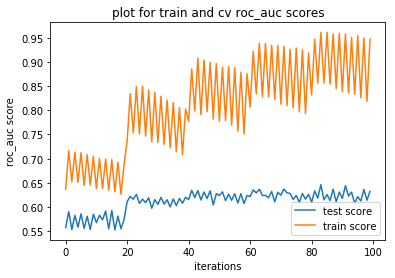

In [ ]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score

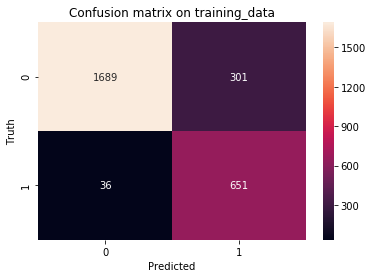

----------------------------
TP: 651
TN: 1689
FP: 301
FN: 36
F1-score: 0.7943868212324587
accuracy: 0.8741128128502055
Precision: 0.6838235294117647
Recall: 0.9475982532751092


In [ ]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

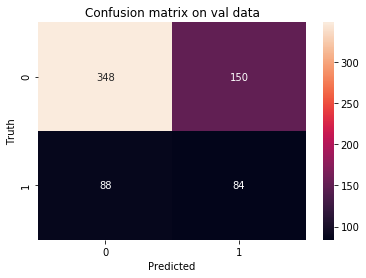

----------------------------
----------------------------
TP: 84
TN: 348
FP: 150
FN: 88
----------------------------
F1-score: 0.4137931034482758
accuracy: 0.6447761194029851
Precision: 0.358974358974359
Recall: 0.4883720930232558


In [ ]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on val data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

In [ ]:
# # on test set
# sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
# plt.title('Confusion matrix on test data')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()
# print("----------------------------")

# tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
# print("----------------------------")

# print('TP: {}'.format(tp))
# print('TN: {}'.format(tn))
# print('FP: {}'.format(fp))
# print('FN: {}'.format(fn))
# print("----------------------------")

# print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
# print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
# print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
# print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

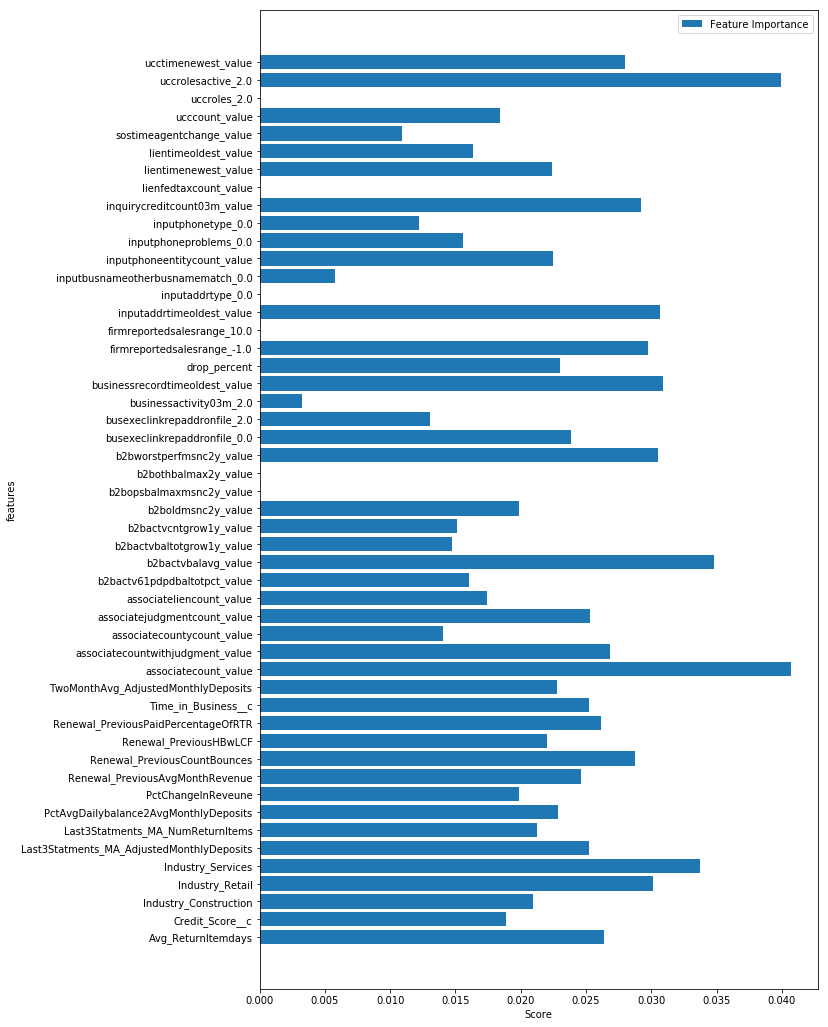

In [ ]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

In [ ]:
feature_importance = pd.DataFrame({'Features':features,'Coefficients':gain})
feature_importance.sort_values(by = 'Coefficients',ascending = False)[:50]

,Coefficients,Features
10,0.040706,associatecount_value
13,0.039904,uccrolesactive_2.0
19,0.034834,b2bactvbalavg_value
24,0.033715,Industry_Services
3,0.030864,businessrecordtimeoldest_value
1,0.030657,inputaddrtimeoldest_value
17,0.030503,b2bworstperfmsnc2y_value
34,0.030126,Industry_Retail
26,0.029726,firmreportedsalesrange_-1.0
12,0.029211,inquirycreditcount03m_value


In [ ]:
feature_importance = feature_importance.sort_values(by = 'Coefficients',ascending = False)
c=0
st = []
for i in feature_importance.index:
    st.append(feature_importance['Features'][i])
    c += 1
    if c==50:
        break
print(st)

['b2bopsbalmaxmsnc2y_value', 'inputaddrtimeoldest_value', 'firmreportedsalesrange_10.0', 'businessrecordtimeoldest_value', 'Last3Statments_MA_NumReturnItems', 'lientimeoldest_value', 'lienfedtaxcount_value', 'lientimenewest_value', 'associateliencount_value', 'b2bactv61pdpdbaltotpct_value', 'associatecount_value', 'Avg_ReturnItemdays', 'inquirycreditcount03m_value', 'uccrolesactive_2.0', 'businessactivity03m_2.0', 'inputaddrtype_0.0', 'b2boldmsnc2y_value', 'b2bworstperfmsnc2y_value', 'associatecountycount_value', 'b2bactvbalavg_value', 'inputphoneproblems_0.0', 'ucctimenewest_value', 'Last3Statments_MA_AdjustedMonthlyDeposits', 'Industry_Construction', 'Industry_Services', 'Renewal_PreviousAvgMonthRevenue', 'firmreportedsalesrange_-1.0', 'drop_percent', 'uccroles_2.0', 'busexeclinkrepaddronfile_0.0', 'associatecountwithjudgment_value', 'inputphonetype_0.0', 'Renewal_PreviousPaidPercentageOfRTR', 'ucccount_value', 'Industry_Retail', 'busexeclinkrepaddronfile_2.0', 'PctAvgDailybalance2Av

# Experiment with the 50 most important features

# For Train data

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
3089,0
2125,0
780,0
3312,1
3213,1
3291,0
3109,0
1696,0
3179,0
1944,1


In [ ]:
check['Predicted Values'] = predict_y_train

In [ ]:
check

,WriteOff_YN,Predicted Values
3089,0,0
2125,0,0
780,0,0
3312,1,1
3213,1,1
3291,0,0
3109,0,1
1696,0,0
3179,0,0
1944,1,1


In [ ]:
predict_y_proba_train

array([[ 0.91231084,  0.08768915],
       [ 0.62259567,  0.3774043 ],
       [ 0.76569688,  0.2343031 ],
       ..., 
       [ 0.74772137,  0.25227863],
       [ 0.93641776,  0.06358225],
       [ 0.32651764,  0.67348236]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_train:
    write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
3089,0,0,0.087689
2125,0,0,0.377404
780,0,0,0.234303
3312,1,1,0.819155
3213,1,1,0.928201
3291,0,0,0.318983
3109,0,1,0.524061
1696,0,0,0.056630
3179,0,0,0.166918
1944,1,1,0.762643


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.978606402874
Min_propability_value:  0.00519271194935


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
3089,0,0,0.087689,0062M00000mTVrOQAW
2125,0,0,0.377404,0062M00000g9zHNQAY
780,0,0,0.234303,0062M00000nX1vCQAS
3312,1,1,0.819155,0062M00000l03MAQAY
3213,1,1,0.928201,0062M00000n1LlWQAU
3291,0,0,0.318983,0062M00000kzSydQAE
3109,0,1,0.524061,0062M00000nYP8nQAG
1696,0,0,0.056630,0062M00000iCo1OQAS
3179,0,0,0.166918,0062M00000kz7bhQAA
1944,1,1,0.762643,0062M00000nZkEwQAK


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.978606402874
Min_propability_value:  0.00519271194935


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
#     funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
#     gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
#     funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
#     gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
#     funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
#     gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
#     funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
#     gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
#     funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
#     gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
#     funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
#     gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
#     funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
#     gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
#     funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
#     gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
#     funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
#     gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
#     funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
#     gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
3089,0,0,0.087689,0062M00000mTVrOQAW,2
2125,0,0,0.377404,0062M00000g9zHNQAY,6
780,0,0,0.234303,0062M00000nX1vCQAS,4
3312,1,1,0.819155,0062M00000l03MAQAY,10
3213,1,1,0.928201,0062M00000n1LlWQAU,10
3291,0,0,0.318983,0062M00000kzSydQAE,5
3109,0,1,0.524061,0062M00000nYP8nQAG,7
1696,0,0,0.056630,0062M00000iCo1OQAS,1
3179,0,0,0.166918,0062M00000kz7bhQAA,3
1944,1,1,0.762643,0062M00000nZkEwQAK,9


In [ ]:
check['Predicted_Prob_WO = 1'].nunique()

2677

In [ ]:
check['Predicted_Prob_WO = 1'].max()

0.97860640287399292

In [ ]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.8091840147972108

In [ ]:
len(check[check['Decile']==10])

268

In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
918,0,0,0.005193,0062M00000o9OgKQAU,1
1281,0,0,0.005962,0062M00000oA7LpQAK,1
3265,0,0,0.007235,0062M00000mzzDGQAY,1
1584,0,0,0.009011,0062M00000mdrysQAA,1
980,0,0,0.009666,0062M00000kyaxaQAA,1
2753,0,0,0.010330,0062M00000idZJqQAM,1
701,0,0,0.010632,0062M00000kx1ciQAA,1
405,0,0,0.011955,0062M00000hm9UCQAY,1
2222,0,0,0.012294,0062M00000kyIsIQAU,1
2375,0,0,0.014676,0062M00000mfyvzQAA,1


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
918,0,0,0.005193,0062M00000o9OgKQAU,1
1281,0,0,0.005962,0062M00000oA7LpQAK,1
3265,0,0,0.007235,0062M00000mzzDGQAY,1
1584,0,0,0.009011,0062M00000mdrysQAA,1
980,0,0,0.009666,0062M00000kyaxaQAA,1
2753,0,0,0.010330,0062M00000idZJqQAM,1
701,0,0,0.010632,0062M00000kx1ciQAA,1
405,0,0,0.011955,0062M00000hm9UCQAY,1
2222,0,0,0.012294,0062M00000kyIsIQAU,1
2375,0,0,0.014676,0062M00000mfyvzQAA,1


In [ ]:
len(exp_df[exp_df['Decile']==1])

268

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

2677

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

687

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    268
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(0, 0, 0, 0, 3, 16, 45, 136, 227, 260)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(0, 0, 0, 0, 3, 19, 64, 200, 427, 687)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

0.0 0.0 0.0 0.0 1.1194029850746268 5.992509363295881 16.791044776119403 50.93632958801498 84.70149253731343 97.01492537313433


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles,
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

0.0 0.0 0.0 0.0 0.43668122270742354 2.7656477438136826 9.315866084425037 29.112081513828237 62.154294032023294 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses

- The value of lift in case of good model should be high.s

In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.0 0.0 0.0 0.0 0.008733624454148471 0.046094129063561376 0.13308380120607197 0.363901018922853 0.6906032670224811 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.081202320754528046,
 0.14172787964344025,
 0.1997704803943634,
 0.2694888710975647,
 0.34948420524597168,
 0.44911625981330872,
 0.57336229085922241,
 0.69738364219665527,
 0.80889147520065308,
 0.97860640287399292]

In [ ]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.0051927119493484497,
 0.081222705543041229,
 0.14183902740478516,
 0.19979853928089142,
 0.26949363946914673,
 0.34954285621643066,
 0.44961026310920715,
 0.57479196786880493,
 0.69768595695495605,
 0.80962282419204712]

In [ ]:
avg_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[4.97, 11.04, 17.15, 23.42, 31.16, 39.68, 51.01, 63.59, 75.52, 86.85]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[268, 268, 267, 268, 268, 267, 268, 267, 268, 268]

In [ ]:
funded_amt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
gross_amt

[6106.26,
 13131.89,
 53307.86,
 78869.71999999999,
 487366.76,
 257885.05,
 634056.11,
 1561268.2700000003,
 1187245.8100000003,
 1273338.9000000008]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.001099716475232148,
 0.0034647248083093988,
 0.01306528749338485,
 0.027269453460924135,
 0.11504253476642247,
 0.16148674745980046,
 0.2756780774045796,
 0.5568571360716186,
 0.7706760329753432,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0020273107569721118,
 0.0026160837105987937,
 0.011635206041557534,
 0.01408169643654452,
 0.08666408707542993,
 0.050072977975155836,
 0.08604915399507315,
 0.23470518367297855,
 0.26210831199222895,
 0.29116536223211026]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            #'Funded_$':funded_amt,
            #'%_Funded_$':funded_amt_pct,
            #'Funded_WO_Gross_$':gross_amt,
            #'%_Funded_WO_Gross_$':gross_amt_pct,
            #"Cum_WO_$" :cum_gross_pct,
            #'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,0.000000,4.97,0.000000,1,8.12,0.52,268,0
1,0.000000,11.04,0.000000,2,14.17,8.12,268,0
2,0.000000,17.15,0.000000,3,19.98,14.18,267,0
3,0.000000,23.42,0.000000,4,26.95,19.98,268,0
4,1.119403,31.16,0.436681,5,34.95,26.95,268,3
5,5.992509,39.68,2.765648,6,44.91,34.95,267,16
6,16.791045,51.01,9.315866,7,57.34,44.96,268,45
7,50.936330,63.59,29.112082,8,69.74,57.48,267,136
8,84.701493,75.52,62.154294,9,80.89,69.77,268,227
9,97.014925,86.85,100.000000,10,97.86,80.96,268,260


In [ ]:
#final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
#final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
#final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,0.00,4.97,0.00,1,8.12,0.52,268,0
1,0.00,11.04,0.00,2,14.17,8.12,268,0
2,0.00,17.15,0.00,3,19.98,14.18,267,0
3,0.00,23.42,0.00,4,26.95,19.98,268,0
4,1.12,31.16,0.44,5,34.95,26.95,268,3
5,5.99,39.68,2.77,6,44.91,34.95,267,16
6,16.79,51.01,9.32,7,57.34,44.96,268,45
7,50.94,63.59,29.11,8,69.74,57.48,267,136
8,84.70,75.52,62.15,9,80.89,69.77,268,227
9,97.01,86.85,100.00,10,97.86,80.96,268,260


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

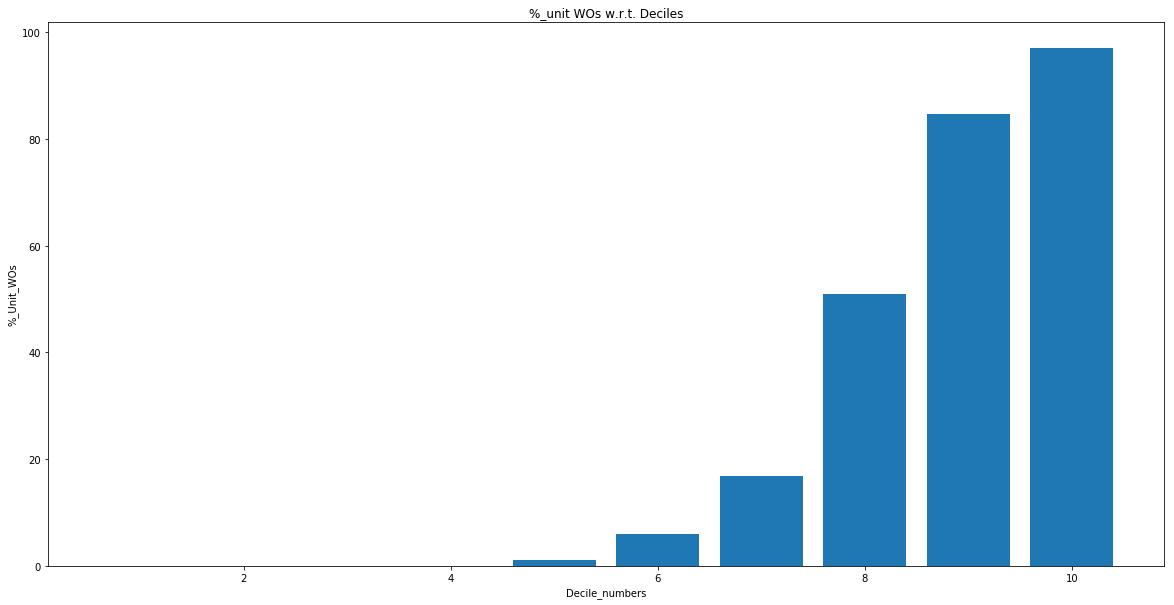

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])
plt.show()

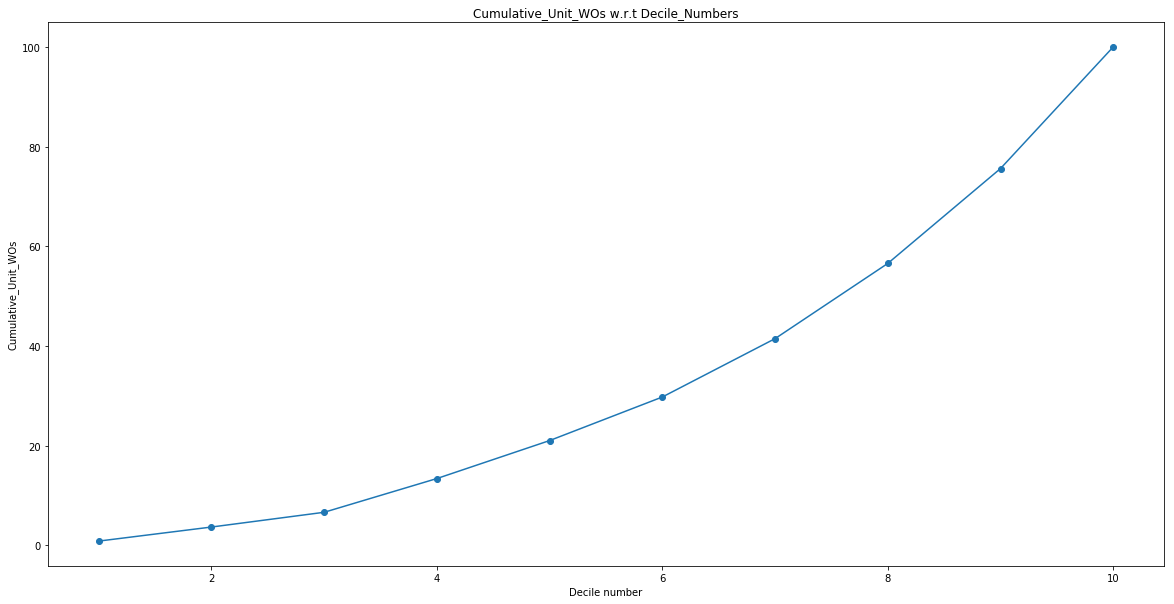

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')
plt.show()
# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [ ]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
2460,0
1389,0
339,1
457,1
2525,1
1067,0
2689,0
738,1
808,0
1837,0


In [ ]:
check['Predicted Values'] = predict_y_val

In [ ]:
check

,WriteOff_YN,Predicted Values
2460,0,0
1389,0,0
339,1,0
457,1,0
2525,1,1
1067,0,0
2689,0,0
738,1,1
808,0,0
1837,0,1


In [ ]:
predict_y_proba_val

array([[ 0.93323517,  0.06676486],
       [ 0.89680314,  0.10319687],
       [ 0.60311079,  0.39688921],
       ..., 
       [ 0.81149828,  0.18850169],
       [ 0.78745669,  0.21254329],
       [ 0.52593482,  0.47406518]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_val:
    write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
2460,0,0,0.066765
1389,0,0,0.103197
339,1,0,0.396889
457,1,0,0.125208
2525,1,1,0.621556
1067,0,0,0.128945
2689,0,0,0.083173
738,1,1,0.589558
808,0,0,0.424345
1837,0,1,0.679298


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
    check['OpportunityID'][i] = data['OpportunityID'][i]

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
2460,0,0,0.066765,0062M00000mfxWKQAY
1389,0,0,0.103197,0062M00000nqIwCQAU
339,1,0,0.396889,0062M00000nGdOMQA0
457,1,0,0.125208,0062M00000oPZkRQAW
2525,1,1,0.621556,0062M00000no5fhQAA
1067,0,0,0.128945,0062M00000l0bZ4QAI
2689,0,0,0.083173,0062M00000lsnObQAI
738,1,1,0.589558,0062M00000meEupQAE
808,0,0,0.424345,0062M00000nYeMCQA0
1837,0,1,0.679298,0062M00000mT4H8QAK


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.973393499851
Min_propability_value:  0.0155875096098


In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
#     funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
#     gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
#     funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
#     gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
#     funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
#     gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
#     funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
#     gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d7 = advanced_amt_d7 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
#     funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
#     gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
#     funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
#     gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
#     funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
#     gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
#     funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
#     gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
#     funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
#     gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
#     funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
#     gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2460,0,0,0.066765,0062M00000mfxWKQAY,1
1389,0,0,0.103197,0062M00000nqIwCQAU,2
339,1,0,0.396889,0062M00000nGdOMQA0,6
457,1,0,0.125208,0062M00000oPZkRQAW,2
2525,1,1,0.621556,0062M00000no5fhQAA,8
1067,0,0,0.128945,0062M00000l0bZ4QAI,2
2689,0,0,0.083173,0062M00000lsnObQAI,2
738,1,1,0.589558,0062M00000meEupQAE,8
808,0,0,0.424345,0062M00000nYeMCQA0,6
1837,0,1,0.679298,0062M00000mT4H8QAK,8


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1546,0,0,0.015588,0062M00000jKGsuQAG,1
1275,0,0,0.016043,0062M00000nFVE2QAO,1
2015,0,0,0.017920,0062M00000lXb7tQAC,1
1612,0,0,0.019585,0062M00000jLGqWQAW,1
2826,0,0,0.023358,0062M00000kyoz6QAA,1
1603,0,0,0.024178,0062M00000mhei2QAA,1
525,0,0,0.024542,0062M00000mUMUHQA4,1
1092,0,0,0.026420,0062M00000iu3oyQAA,1
1505,0,0,0.027774,0062M00000lUqJBQA0,1
2322,0,0,0.028484,0062M00000nYnjjQAC,1


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1546,0,0,0.015588,0062M00000jKGsuQAG,1
1275,0,0,0.016043,0062M00000nFVE2QAO,1
2015,0,0,0.017920,0062M00000lXb7tQAC,1
1612,0,0,0.019585,0062M00000jLGqWQAW,1
2826,0,0,0.023358,0062M00000kyoz6QAA,1
1603,0,0,0.024178,0062M00000mhei2QAA,1
525,0,0,0.024542,0062M00000mUMUHQA4,1
1092,0,0,0.026420,0062M00000iu3oyQAA,1
1505,0,0,0.027774,0062M00000lUqJBQA0,1
2322,0,0,0.028484,0062M00000nYnjjQAC,1


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

670

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

172

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    42
1     4
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(4, 7, 4, 14, 21, 30, 27, 32, 17, 16)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(4, 11, 15, 29, 50, 80, 107, 139, 156, 172)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

8.695652173913043 10.9375 8.333333333333334 24.137931034482758 25.0 31.914893617021278 28.42105263157895 41.02564102564103 28.333333333333332 37.2093023255814


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

2.3255813953488373 6.395348837209303 8.720930232558139 16.86046511627907 29.069767441860467 46.51162790697674 62.2093023255814 80.81395348837209 90.69767441860465 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.23255813953488375 0.31976744186046513 0.2906976744186046 0.4215116279069767 0.5813953488372093 0.7751937984496123 0.8887043189368771 1.010174418604651 1.0077519379844961 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[46, 64, 48, 58, 84, 94, 95, 78, 60, 43]

In [ ]:
sum(no_of_opps)

670

In [ ]:
funded_amt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
gross_amt

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.0018088958255324684,
 0.005551561507774018,
 0.01424944860846718,
 0.05960451726164523,
 0.12718834290535372,
 0.21522584976417047,
 0.3269520528866352,
 0.571063357453675,
 0.84423579711392,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.005212048780487805,
 0.004605625,
 0.011021008223096174,
 0.043419962182604,
 0.0979073577501635,
 0.05514288289562052,
 0.0807653138858599,
 0.28552575577557754,
 0.20893844958563534,
 0.39847173058155716]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            #'Funded_$':funded_amt,
            #'%_Funded_$':funded_amt_pct,
            #'Funded_WO_Gross_$':gross_amt,
            #'%_Funded_WO_Gross_$':gross_amt_pct,
            #"Cum_WO_$" :cum_gross_pct,
            #'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,8.695652,4.97,2.325581,1,8.12,0.52,46,4
1,10.937500,11.04,6.395349,2,14.17,8.12,64,7
2,8.333333,17.15,8.720930,3,19.98,14.18,48,4
3,24.137931,23.42,16.860465,4,26.95,19.98,58,14
4,25.000000,31.16,29.069767,5,34.95,26.95,84,21
5,31.914894,39.68,46.511628,6,44.91,34.95,94,30
6,28.421053,51.01,62.209302,7,57.34,44.96,95,27
7,41.025641,63.59,80.813953,8,69.74,57.48,78,32
8,28.333333,75.52,90.697674,9,80.89,69.77,60,17
9,37.209302,86.85,100.000000,10,97.86,80.96,43,16


In [ ]:
#final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
#final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
#final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,8.70,4.97,2.33,1,8.12,0.52,46,4
1,10.94,11.04,6.40,2,14.17,8.12,64,7
2,8.33,17.15,8.72,3,19.98,14.18,48,4
3,24.14,23.42,16.86,4,26.95,19.98,58,14
4,25.00,31.16,29.07,5,34.95,26.95,84,21
5,31.91,39.68,46.51,6,44.91,34.95,94,30
6,28.42,51.01,62.21,7,57.34,44.96,95,27
7,41.03,63.59,80.81,8,69.74,57.48,78,32
8,28.33,75.52,90.70,9,80.89,69.77,60,17
9,37.21,86.85,100.00,10,97.86,80.96,43,16


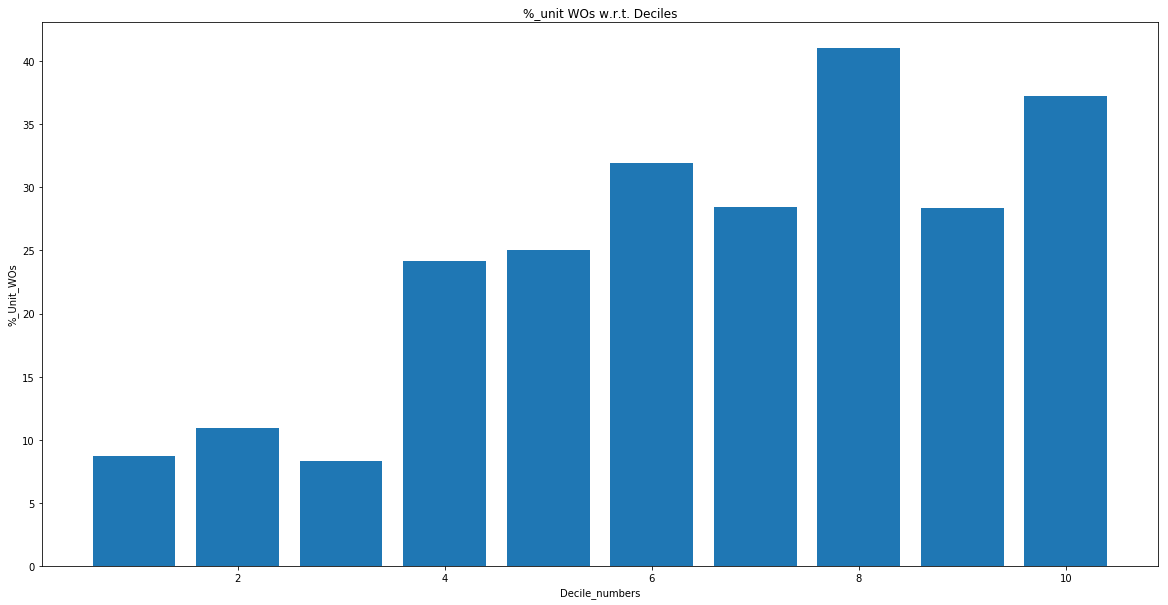

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])
plt.show()

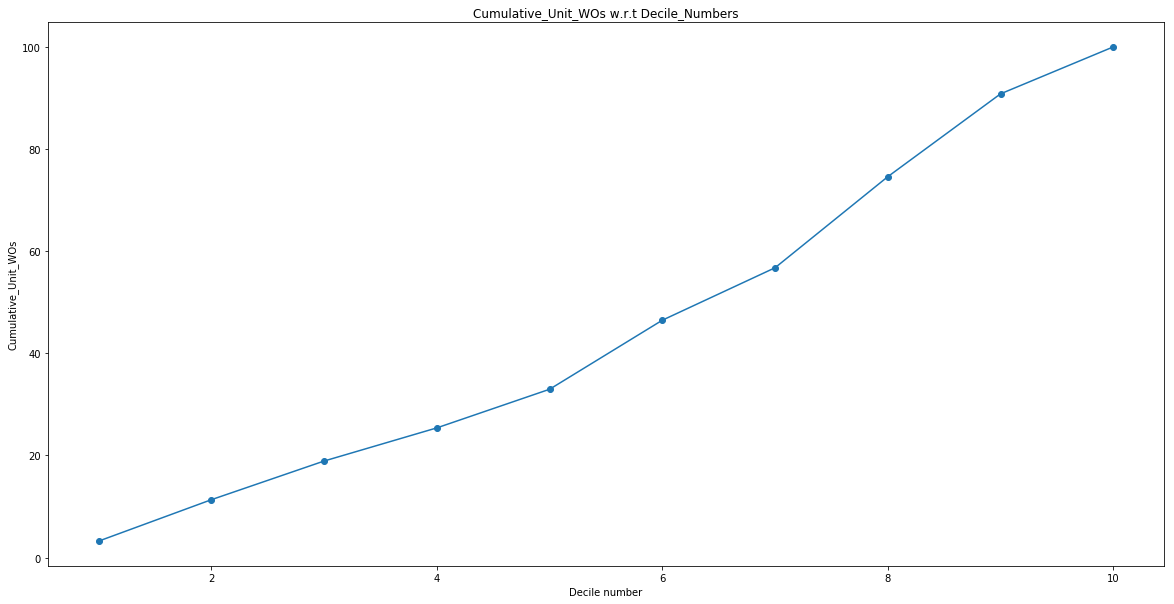

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')
plt.show()
# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [ ]:
check['Predicted Values'] = predict_y_test

In [ ]:
check

,WriteOff_YN,Predicted Values
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
481,0,1
482,0,1
483,0,1
484,0,0


In [ ]:
print(predict_y_proba_test)

[[0.28461277 0.7153872 ]
 [0.66327024 0.33672974]
 [0.22862142 0.7713786 ]
 [0.8026972  0.1973028 ]
 [0.36226732 0.6377327 ]
 [0.3093844  0.6906156 ]
 [0.4995337  0.5004663 ]
 [0.43662858 0.5633714 ]
 [0.27223527 0.7277647 ]
 [0.36792374 0.63207626]
 [0.44089067 0.55910933]
 [0.31859332 0.6814067 ]
 [0.45840514 0.54159486]
 [0.4915139  0.5084861 ]
 [0.20207405 0.79792595]
 [0.5781908  0.4218092 ]
 [0.6462403  0.3537597 ]
 [0.23659337 0.76340663]
 [0.24544352 0.7545565 ]
 [0.48416293 0.5158371 ]
 [0.5397574  0.4602426 ]
 [0.9009522  0.09904777]
 [0.26820576 0.73179424]
 [0.47340953 0.52659047]
 [0.38097    0.61903   ]
 [0.24282926 0.75717074]
 [0.6845926  0.31540737]
 [0.29058504 0.70941496]
 [0.8367979  0.1632021 ]
 [0.79180324 0.20819674]
 [0.31630147 0.68369853]
 [0.8949257  0.10507429]
 [0.8307183  0.16928169]
 [0.19034302 0.809657  ]
 [0.16748494 0.83251506]
 [0.33564115 0.66435885]
 [0.8828082  0.11719179]
 [0.8211777  0.17882231]
 [0.20424134 0.79575866]
 [0.7992343  0.20076571]


In [ ]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,1,0.715387
1,0,0,0.336730
2,0,1,0.771379
3,0,0,0.197303
4,0,1,0.637733
...,...,...,...
481,0,1,0.800026
482,0,1,0.778790
483,0,1,0.729231
484,0,0,0.116408


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,1,0.715387,0062M00000nqf6oQAA
1,0,0,0.336730,0062M00000nqfF3QAI
2,0,1,0.771379,0062M00000nqjtvQAA
3,0,0,0.197303,0062M00000nqs8FQAQ
4,0,1,0.637733,0062M00000nr94cQAA
...,...,...,...,...
481,0,1,0.800026,0062M00000oYVfWQAW
482,0,1,0.778790,0062M00000oYVWyQAO
483,0,1,0.729231,0062M00000oYYg7QAG
484,0,0,0.116408,0062M00000oYZI3QAO


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.8725887
Min_propability_value:  0.06348297


In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data_test['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data_test['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data_test['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data_test['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data_test['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data_test['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data_test['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data_test['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data_test['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data_test['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data_test['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data_test['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
0,0,1,0.715387,0062M00000nqf6oQAA,9
1,0,0,0.336730,0062M00000nqfF3QAI,5
2,0,1,0.771379,0062M00000nqjtvQAA,10
3,0,0,0.197303,0062M00000nqs8FQAQ,3
4,0,1,0.637733,0062M00000nr94cQAA,8
...,...,...,...,...,...
481,0,1,0.800026,0062M00000oYVfWQAW,10
482,0,1,0.778790,0062M00000oYVWyQAO,10
483,0,1,0.729231,0062M00000oYYg7QAG,9
484,0,0,0.116408,0062M00000oYZI3QAO,1


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
325,0,0,0.063483,0062M00000oPRcuQAG,1
254,0,0,0.075990,0062M00000oBvrOQAS,1
173,0,0,0.078909,0062M00000oAQqwQAG,1
201,0,0,0.086396,0062M00000oB03NQAS,1
151,0,0,0.086658,0062M00000oAen7QAC,1
...,...,...,...,...,...
143,1,1,0.843398,0062M00000oAd5HQAS,10
322,1,1,0.853358,0062M00000oPQOUQA4,10
44,1,1,0.853358,0062M00000o8pSmQAI,10
439,1,1,0.866656,0062M00000oXyg9QAC,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
325,0,0,0.063483,0062M00000oPRcuQAG,1
254,0,0,0.075990,0062M00000oBvrOQAS,1
173,0,0,0.078909,0062M00000oAQqwQAG,1
201,0,0,0.086396,0062M00000oB03NQAS,1
151,0,0,0.086658,0062M00000oAen7QAC,1
...,...,...,...,...,...
143,1,1,0.843398,0062M00000oAd5HQAS,10
322,1,1,0.853358,0062M00000oPQOUQA4,10
44,1,1,0.853358,0062M00000o8pSmQAI,10
439,1,1,0.866656,0062M00000oXyg9QAC,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

486

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    42
1     2
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(2, 1, 3, 3, 6, 9, 22, 14, 29, 25)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(2, 3, 6, 9, 15, 24, 46, 60, 89, 114)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

4.545454545454546 2.7027027027027026 6.122448979591836 7.6923076923076925 11.764705882352942 19.148936170212767 39.285714285714285 28.571428571428573 42.64705882352941 54.34782608695652


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

1.7543859649122806 2.631578947368421 5.263157894736842 7.894736842105263 13.157894736842104 21.052631578947366 40.35087719298245 52.63157894736842 78.0701754385965 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.17543859649122806 0.13157894736842105 0.17543859649122806 0.19736842105263158 0.2631578947368421 0.3508771929824561 0.5764411027568922 0.6578947368421052 0.8674463937621832 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[44, 37, 49, 39, 51, 47, 56, 49, 68, 46]

In [ ]:
sum(no_of_opps)

486

In [ ]:
funded_amt

[550500,
 490586,
 1875500,
 789500,
 736500,
 3566015,
 1680500,
 2141000,
 1712000,
 726300]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.03858176, 0.03438269, 0.1314443 , 0.05533206, 0.05161756,
       0.24992394, 0.11777774, 0.15005185, 0.11998541, 0.05090269])

In [ ]:
gross_amt

[0.0,
 3481.25,
 32079.15,
 14911.74,
 23413.11,
 47820.649999999994,
 164095.54999999996,
 72630.83000000002,
 469011.5400000001,
 166470.52000000002]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.0,
 0.0035025654222878,
 0.035778133556257974,
 0.05078117697748479,
 0.07433764362429865,
 0.1224510957352723,
 0.28755138999201874,
 0.36062693290047504,
 0.8325101939871398,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0,
 0.007096105473861872,
 0.01710431884830712,
 0.018887574414186193,
 0.03178969450101833,
 0.013410109043287814,
 0.09764686105325794,
 0.03392378794955629,
 0.2739553387850468,
 0.2292035247143054]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,44,2,4.545455,1.754386,550500,0.038582,0.00,0.000000,0.000000,6291.84,10.73,4.63,13.09
1,2,37,1,2.702703,2.631579,490586,0.034383,3481.25,0.007096,0.003503,8381.25,15.53,13.12,18.47
2,3,49,3,6.122449,5.263158,1875500,0.131444,32079.15,0.017104,0.035778,65769.15,21.09,18.50,24.65
3,4,39,3,7.692308,7.894737,789500,0.055332,14911.74,0.018888,0.050781,33551.72,27.78,24.68,31.77
4,5,51,6,11.764706,13.157895,736500,0.051618,23413.11,0.031790,0.074338,47840.46,38.24,31.78,45.01
5,6,47,9,19.148936,21.052632,3566015,0.249924,47820.65,0.013410,0.122451,103703.94,50.87,45.10,55.41
6,7,56,22,39.285714,40.350877,1680500,0.117778,164095.55,0.097647,0.287551,314895.29,59.39,55.41,62.73
7,8,49,14,28.571429,52.631579,2141000,0.150052,72630.83,0.033924,0.360627,156727.66,66.08,62.76,69.00
8,9,68,29,42.647059,78.070175,1712000,0.119985,469011.54,0.273955,0.832510,786536.54,72.40,69.05,75.86
9,10,46,25,54.347826,100.000000,726300,0.050903,166470.52,0.229204,1.000000,395072.17,80.58,75.96,92.59


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,44,2,4.55,1.75,550500,3.86,0.00,0.00,0.00,6291.84,10.73,4.63,13.09
1,2,37,1,2.70,2.63,490586,3.44,3481.25,0.71,0.35,8381.25,15.53,13.12,18.47
2,3,49,3,6.12,5.26,1875500,13.14,32079.15,1.71,3.58,65769.15,21.09,18.50,24.65
3,4,39,3,7.69,7.89,789500,5.53,14911.74,1.89,5.08,33551.72,27.78,24.68,31.77
4,5,51,6,11.76,13.16,736500,5.16,23413.11,3.18,7.43,47840.46,38.24,31.78,45.01
5,6,47,9,19.15,21.05,3566015,24.99,47820.65,1.34,12.25,103703.94,50.87,45.10,55.41
6,7,56,22,39.29,40.35,1680500,11.78,164095.55,9.76,28.76,314895.29,59.39,55.41,62.73
7,8,49,14,28.57,52.63,2141000,15.01,72630.83,3.39,36.06,156727.66,66.08,62.76,69.00
8,9,68,29,42.65,78.07,1712000,12.00,469011.54,27.40,83.25,786536.54,72.40,69.05,75.86
9,10,46,25,54.35,100.00,726300,5.09,166470.52,22.92,100.00,395072.17,80.58,75.96,92.59


<BarContainer object of 10 artists>

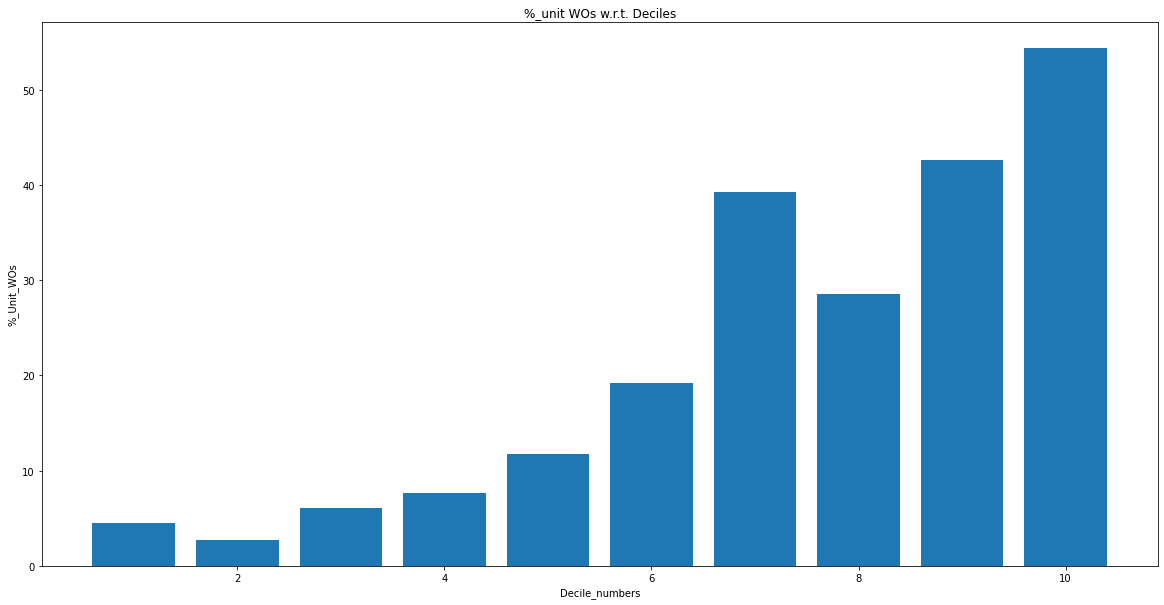

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

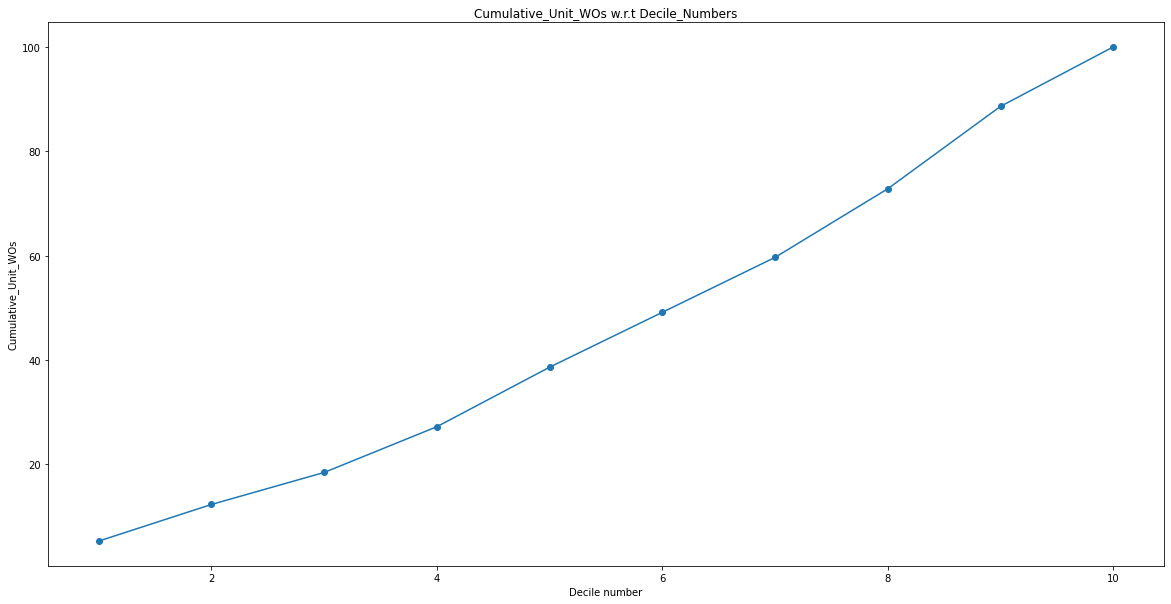

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}